# 卒業研究18：エンコーダーモデルを用いたノイズ除去の可能性


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# データの読み込み
import os
# カレントディレクトリを取得
data_path = os.getcwd()

data = pd.read_csv(data_path + '/drive/MyDrive/卒研/EuF3_data.csv' , sep='\t')

In [ ]:
# 横軸に1列目のデータを使用
x = data.iloc[:, 0]

# 3列目から5列目のデータをそれぞれプロット
for i in range(2, 5):
    plt.plot(x, data.iloc[:, i], label=f'EuF3_w{i-1}')

# 凡例を追加
plt.legend()

# グラフのタイトルと軸ラベルを設定
plt.title('Data')
plt.xlabel('Velocity (mm/s)')
plt.ylabel('Values')

# グラフを表示
plt.show()

In [67]:
# 空のデータフレームを作成
number = 100
dataset = pd.DataFrame()
dataset[data.columns[0]] = data.iloc[:, 0]

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i + 10)
    column_name = f'w1_noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data['EuF3_w1T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset[column_name] = data['EuF3_w1T7_8S5_85'] + noise

test = pd.DataFrame()
test[data.columns[0]] = data.iloc[:, 0]

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i + 500)
    column_name = f'w1_noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data['EuF3_w1T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    test[column_name] = data['EuF3_w1T7_8S5_85'] + noise

<ipython-input-67-afa3a46caac7>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[column_name] = data['EuF3_w1T7_8S5_85'] + noise
<ipython-input-67-afa3a46caac7>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[column_name] = data['EuF3_w1T7_8S5_85'] + noise


In [87]:
x_train = dataset.iloc[:, 1:].T  # ノイズを含んだデータ
x_test = test.iloc[:, 1:].T

In [ ]:
y_train = pd.DataFrame()
for column in x_train.columns[:]:
  y_train[column] = data.iloc[:,2]

y_train = y_train.T

In [90]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
w1_noisy_0,102.294038,97.115707,76.232460,91.537466,98.179496,85.782442,95.658200,94.390460,93.498440,91.765953,...,96.093450,77.809722,87.804684,80.355842,104.619409,115.886876,104.857618,94.274756,100.035559,91.263434
w1_noisy_1,106.251312,87.599281,86.350648,66.220907,92.133402,89.638383,87.918626,96.388951,97.527382,83.152494,...,100.048092,94.914030,78.539165,95.208159,94.503824,109.812666,80.812259,91.134519,86.284405,88.425039
w1_noisy_2,94.162962,83.842014,93.284778,75.338758,99.445205,77.938379,93.145842,92.180173,85.655606,121.216157,...,81.041183,81.135265,108.054446,107.201559,93.078674,89.848785,85.259247,94.323423,85.717967,75.354554
w1_noisy_3,82.937270,97.481475,90.547936,95.942333,105.129643,97.841926,106.123858,101.662201,107.751872,83.348020,...,94.944560,101.358102,94.730610,101.830053,96.574142,84.870747,81.883261,85.946009,94.201717,81.465522
w1_noisy_4,104.375127,91.070548,92.631782,90.925329,72.965867,94.109178,78.612128,95.381337,88.060610,103.938148,...,84.749143,103.395040,87.070917,87.078595,92.382229,95.622300,71.787277,78.003380,95.268232,91.513305


In [92]:
y_train.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,89.683715,90.317998,90.972404,91.617714,92.212957,92.716087,93.096373,93.341734,93.456953,93.45384,...,93.45384,93.456953,93.341734,93.096373,92.716087,92.212957,91.617714,90.972404,90.317998,89.683716
1,89.683715,90.317998,90.972404,91.617714,92.212957,92.716087,93.096373,93.341734,93.456953,93.45384,...,93.45384,93.456953,93.341734,93.096373,92.716087,92.212957,91.617714,90.972404,90.317998,89.683716
2,89.683715,90.317998,90.972404,91.617714,92.212957,92.716087,93.096373,93.341734,93.456953,93.45384,...,93.45384,93.456953,93.341734,93.096373,92.716087,92.212957,91.617714,90.972404,90.317998,89.683716
3,89.683715,90.317998,90.972404,91.617714,92.212957,92.716087,93.096373,93.341734,93.456953,93.45384,...,93.45384,93.456953,93.341734,93.096373,92.716087,92.212957,91.617714,90.972404,90.317998,89.683716
4,89.683715,90.317998,90.972404,91.617714,92.212957,92.716087,93.096373,93.341734,93.456953,93.45384,...,93.45384,93.456953,93.341734,93.096373,92.716087,92.212957,91.617714,90.972404,90.317998,89.683716


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

# オートエンコーダーの構築
input_size = 128  # 入力データの次元数
encoding_dim = 64  # エンコーディング後の次元数

input_data = Input(shape=(input_size,))
encoded = Dense(encoding_dim, activation='relu' , activity_regularizer=l2(0.05))(input_data)
encoded = Dropout(0.5)(encoded)
decoded = Dense(input_size, activation='sigmoid')(encoded)

autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# オートエンコーダーの訓練
history = autoencoder.fit(x_train,
                y_train,
                epochs=50,
                shuffle=True,
                validation_split=0.2)


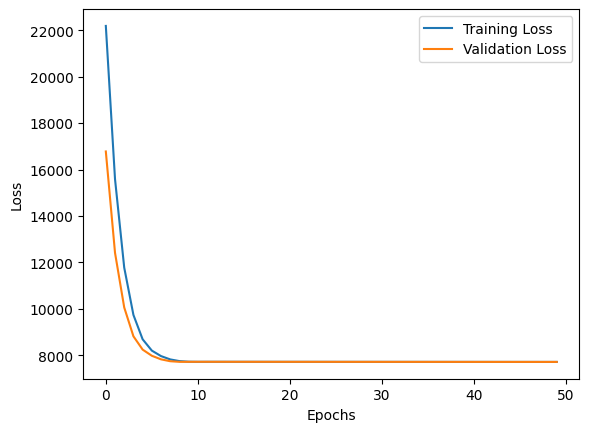

In [143]:
# 損失の可視化
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 [==============================] - 0s 69ms/step


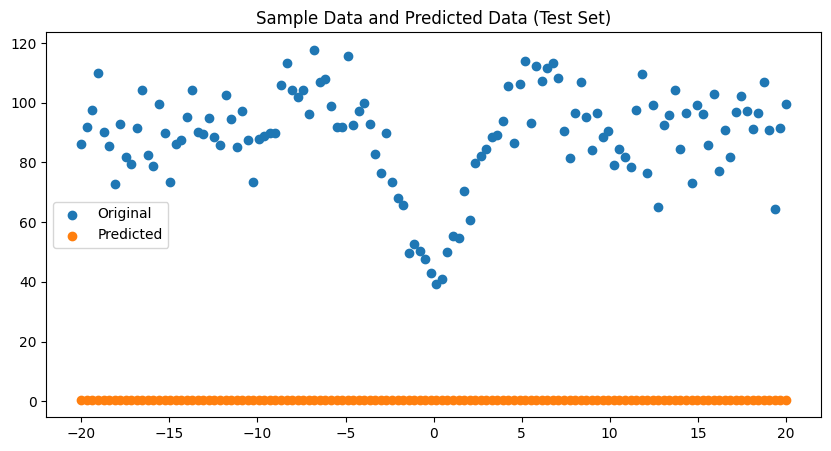

In [144]:
# テストデータに対する予測を取得
x_test_pred = autoencoder.predict(x_test[:1])

# サンプルデータと予測データの可視化
sample_idx = 0  # サンプルのインデックス
plt.figure(figsize=(10, 5))
plt.scatter(data.iloc[:,0] , x_test[:1], label='Original')
plt.scatter(data.iloc[:,0] , x_test_pred , label='Predicted')
plt.legend()
plt.title('Sample Data and Predicted Data (Test Set)')
plt.show()